**Medical-Insurance-Cost-with-Linear-Regression**

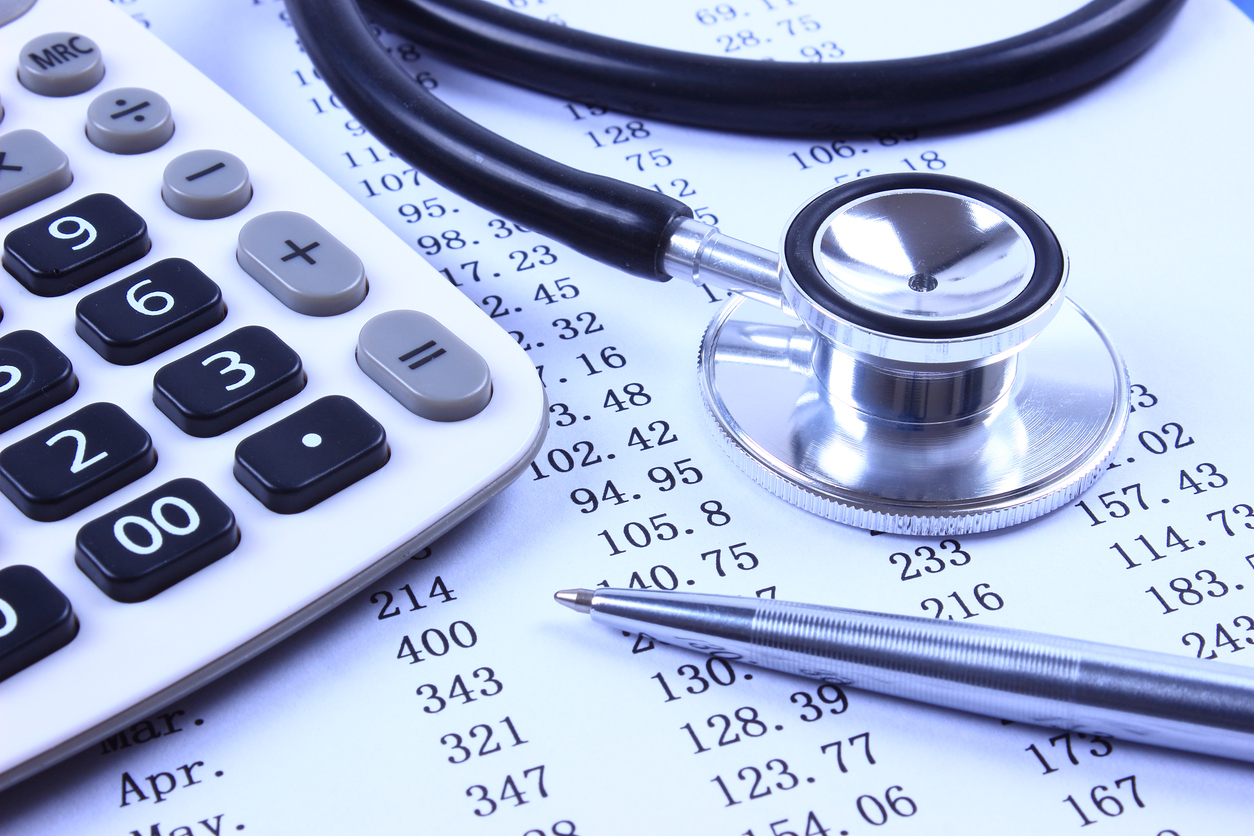

Many factors that affect how much you pay for health insurance are not within your control. Nonetheless, it's good to have an understanding of what they are. Here are some factors that affect how much health insurance premiums cost



* **age:** age of primary beneficiary
*   **sex:** insurance contractor gender, female, male
*   **bmi:** Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9


*   **children:** Number of children covered by health insurance / Number of dependents
*   **smoker:** Smoking


*   **region:** the beneficiary's residential area in the US, northeast, southeast, southwest, northwest










**EDA and Visualizations**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [23]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [49]:
 file_path = '/content/drive/My Drive/insurance.csv'
 df = pd.read_csv(file_path)
 print(df.head())

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


In [52]:
df.shape

(1338, 7)

In [53]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [54]:
df.dtypes

,0
age,int64
sex,object
bmi,float64
children,int64
smoker,object
region,object
charges,float64


In [55]:
df.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


We have 0 missing values which is very good. Now let's do EDA with some cool graphs :) First we'll see how the charges are distributed according to given factors

Text(0.5, 1.0, 'Distribution of Charges')

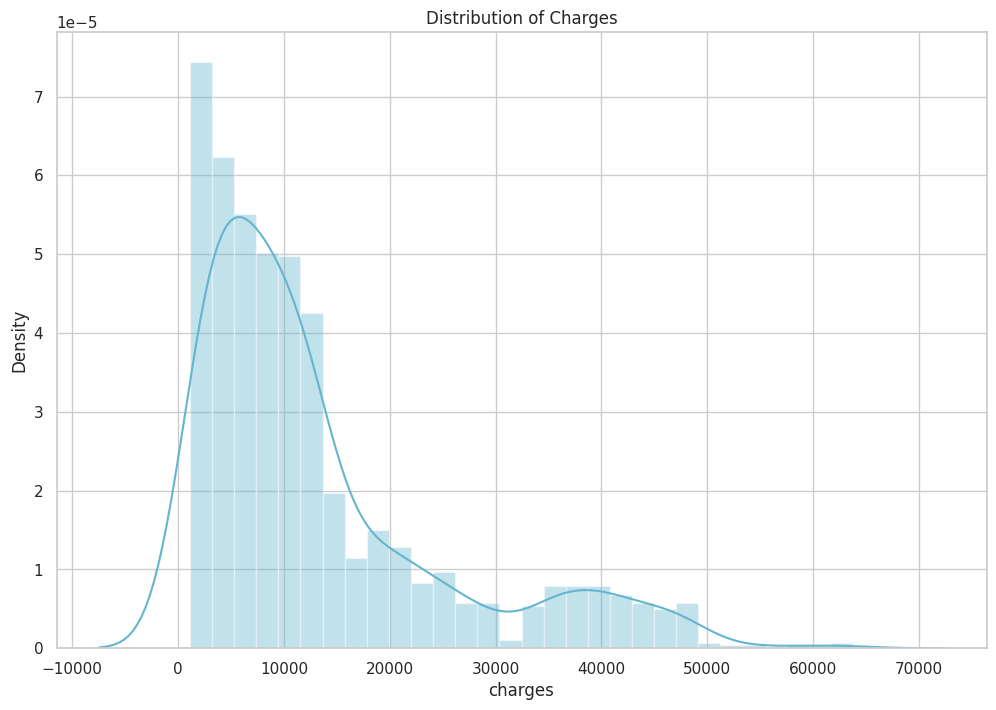

In [56]:
sns.set(style='whitegrid')
f, ax = plt.subplots(1,1, figsize=(12, 8))
ax = sns.distplot(df['charges'], kde = True, color = 'c')
plt.title('Distribution of Charges')

This distribution is right-skewed. To make it closer to normal we can apply natural log

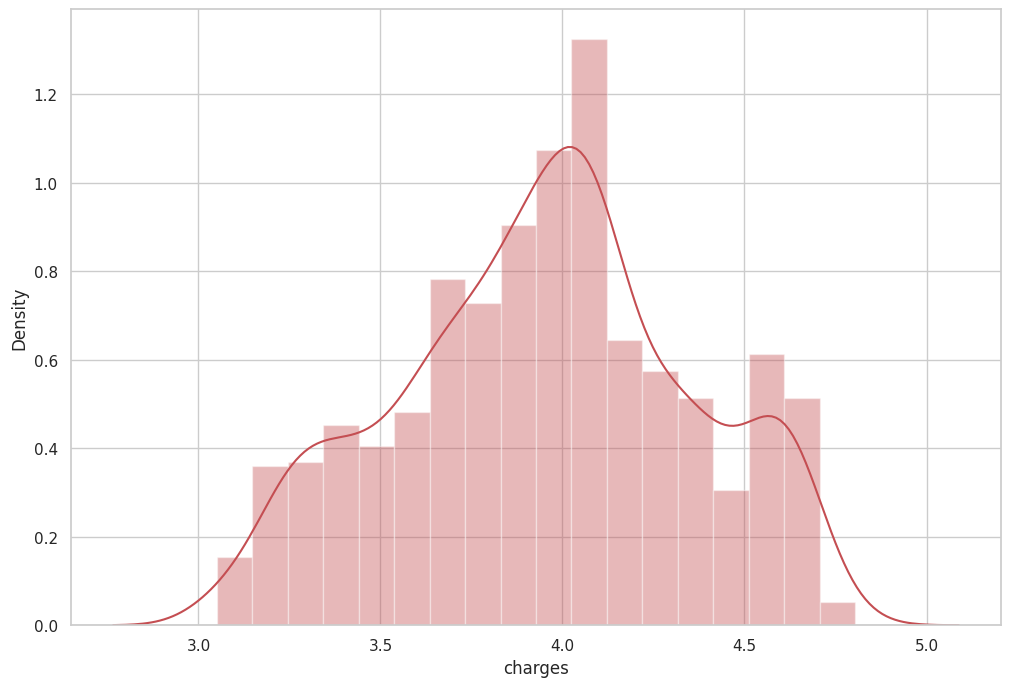

In [57]:
f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.distplot(np.log10(df['charges']), kde = True, color = 'r' )

Now let's look at the charges by region

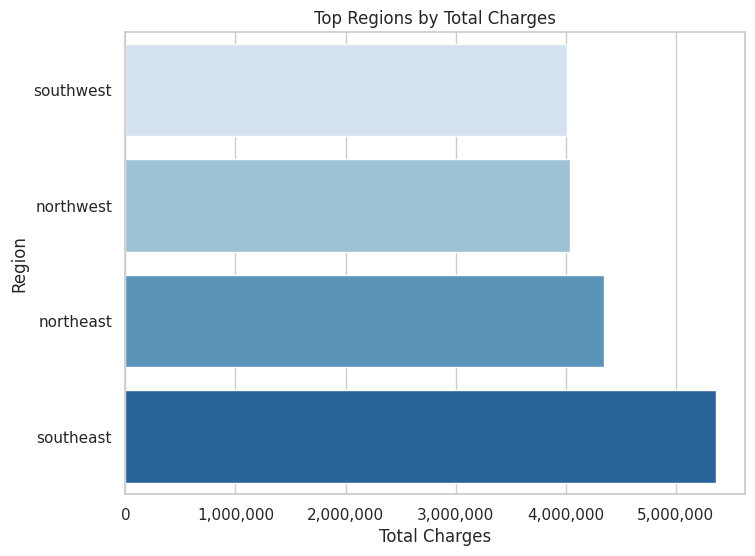

In [67]:
charges = df['charges'].groupby(df.region).sum().sort_values(ascending=True)
f, ax = plt.subplots(1, 1, figsize=(8, 6))

# Explicitly pass x and y
sns.barplot(x=charges.head().values, y=charges.head().index, palette='Blues', ax=ax)

# Add axis labels and a title
ax.set_xlabel('Total Charges')
ax.set_ylabel('Region')
ax.set_title('Top Regions by Total Charges')

# Customize x-axis tick labels to show numbers like 0, 1000000, etc.
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x):,}'))

plt.show()


So overall the highest medical charges are in the Southeast and the lowest are in the Southwest. Taking into account certain factors (sex, smoking, having children) let's see how it changes by region

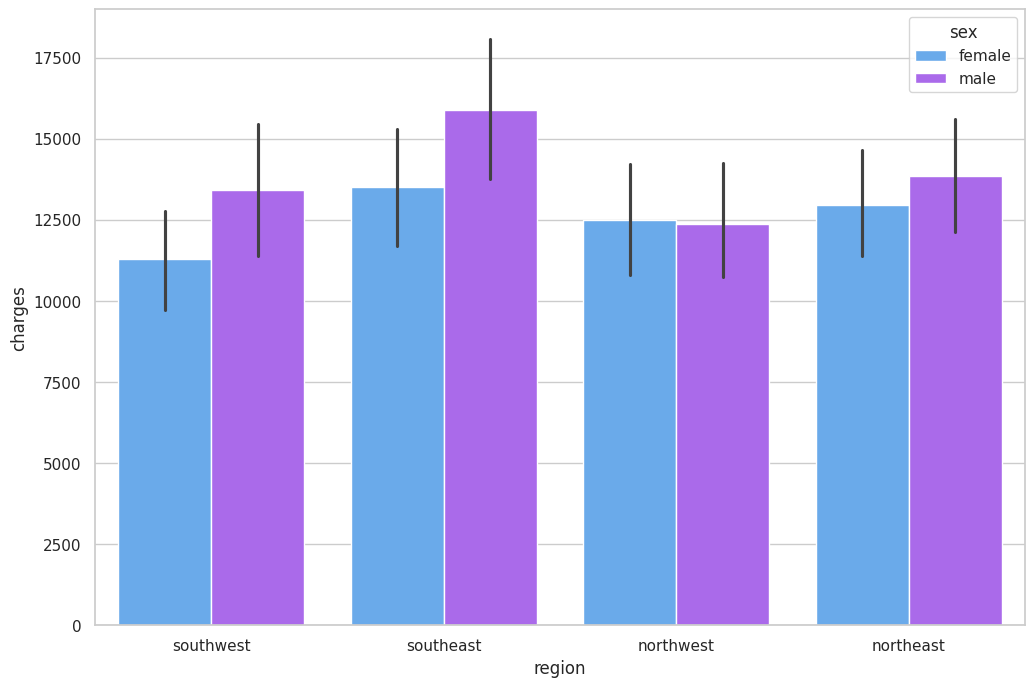

In [68]:
f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.barplot(x='region', y='charges', hue='sex', data=df, palette='cool')

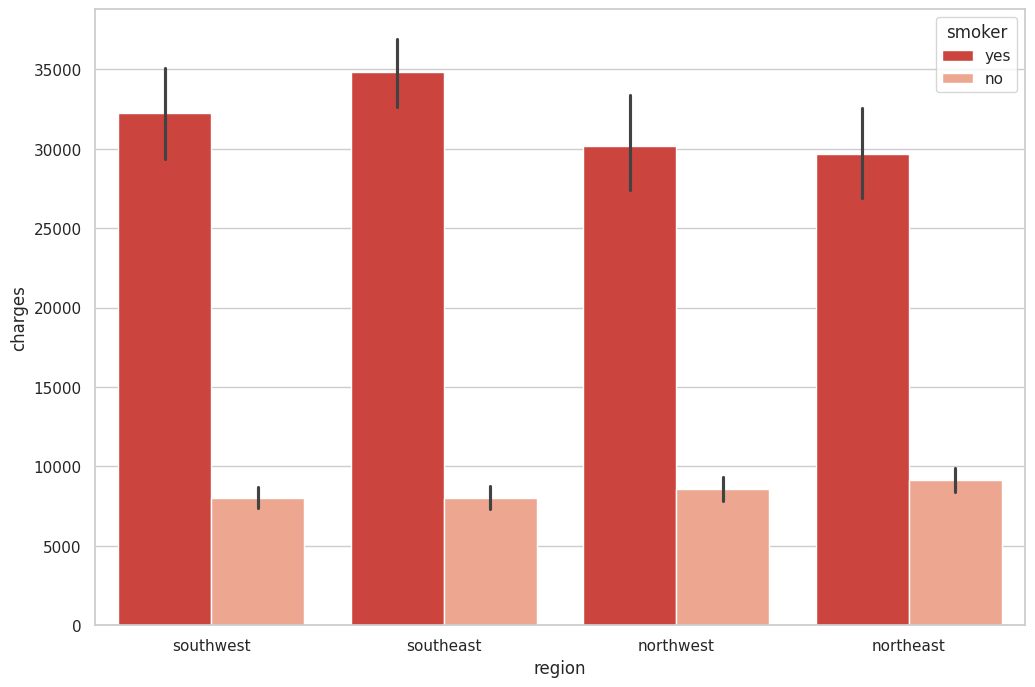

In [69]:
f, ax = plt.subplots(1,1, figsize=(12,8))
ax = sns.barplot(x = 'region', y = 'charges',
                 hue='smoker', data=df, palette='Reds_r')

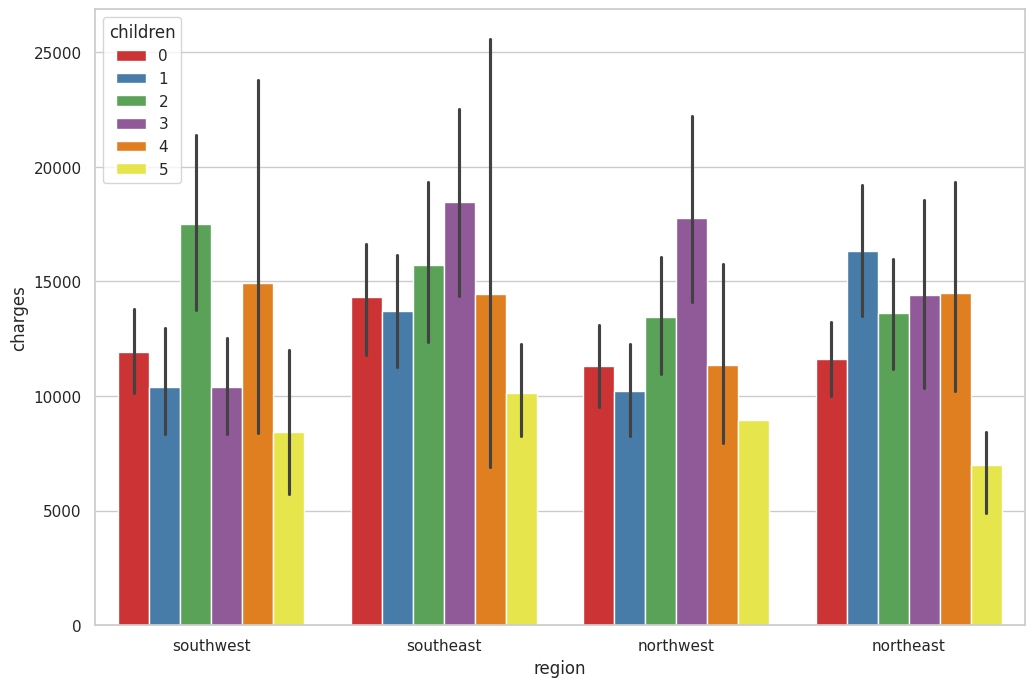

In [70]:
f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.barplot(x='region', y='charges', hue='children', data=df, palette='Set1')

As we can see from these barplots the highest charges due to smoking are still in the Southeast but the lowest are in the Northeast. People in the Southwest generally smoke more than people in the Northeast, but people in the Northeast have higher charges by gender than in the Southwest and Northwest overall. And people with children tend to have higher medical costs overall as well

Now let's analyze the medical charges by age, bmi and children according to the smoking factor

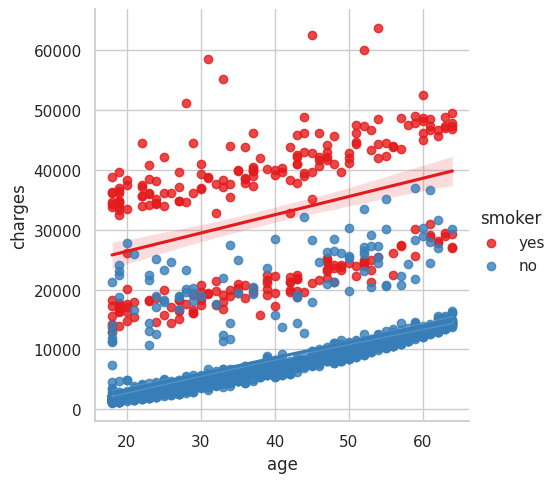

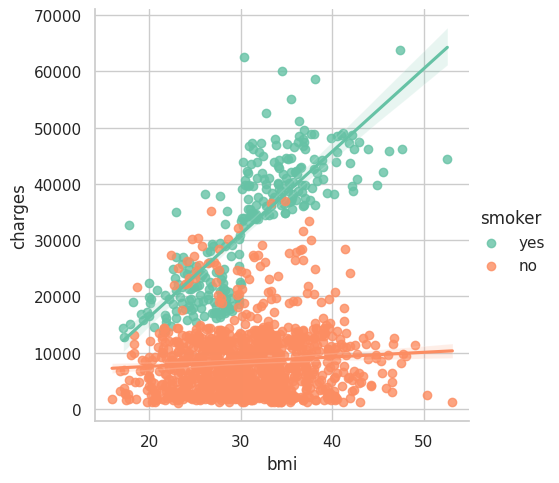

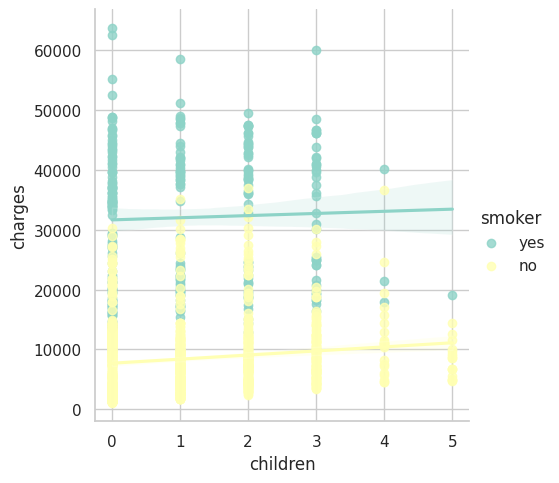

In [71]:
ax = sns.lmplot(x = 'age', y = 'charges', data=df, hue='smoker', palette='Set1')
ax = sns.lmplot(x = 'bmi', y = 'charges', data=df, hue='smoker', palette='Set2')
ax = sns.lmplot(x = 'children', y = 'charges', data=df, hue='smoker', palette='Set3')

Smoking has the highest impact on medical costs, even though the costs are growing with age, bmi and children. Also people who have children generally smoke less, which the following violinplots shows too

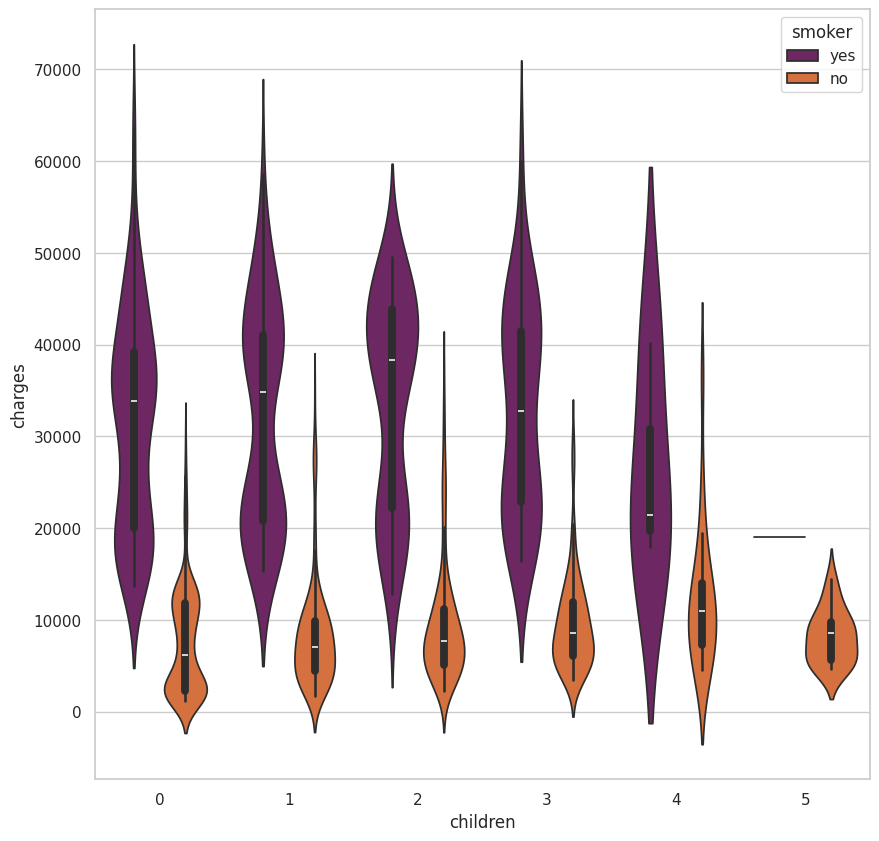

In [72]:
f, ax = plt.subplots(1, 1, figsize=(10, 10))
ax = sns.violinplot(x = 'children', y = 'charges', data=df,
                 orient='v', hue='smoker', palette='inferno')

In [73]:
##Converting objects labels into categorical
df[['sex', 'smoker', 'region']] = df[['sex', 'smoker', 'region']].astype('category')
df.dtypes

,0
age,int64
sex,category
bmi,float64
children,int64
smoker,category
region,category
charges,float64


In [74]:
##Converting category labels into numerical using LabelEncoder
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
label.fit(df.sex.drop_duplicates())
df.sex = label.transform(df.sex)
label.fit(df.smoker.drop_duplicates())
df.smoker = label.transform(df.smoker)
label.fit(df.region.drop_duplicates())
df.region = label.transform(df.region)
df.dtypes

,0
age,int64
sex,int64
bmi,float64
children,int64
smoker,int64
region,int64
charges,float64


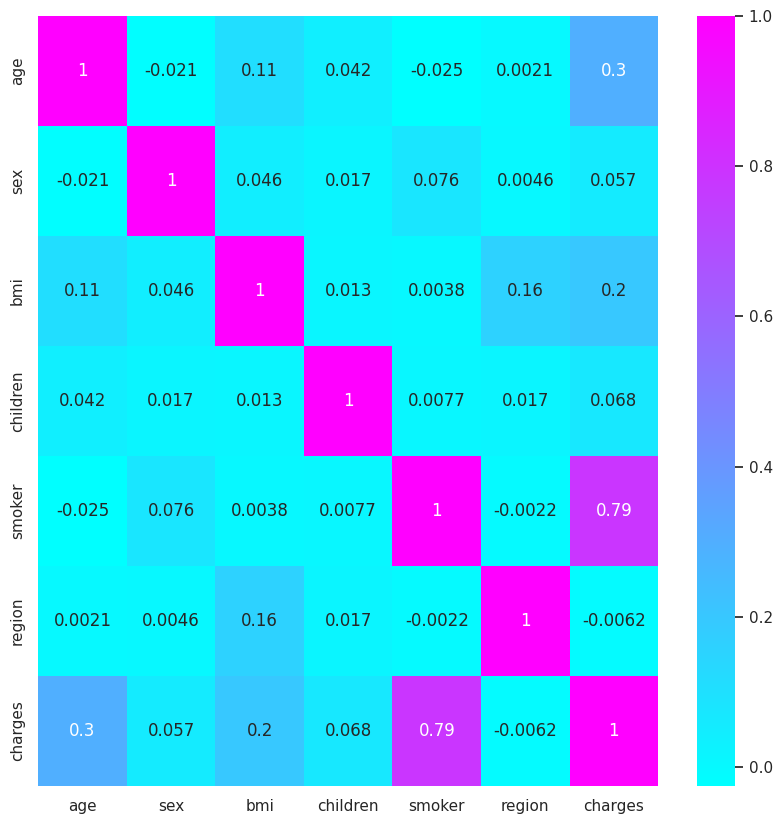

In [75]:
f, ax = plt.subplots(1, 1, figsize=(10, 10))
ax = sns.heatmap(df.corr(), annot=True, cmap='cool')

No correlation, except with the smoking

**Linear Regression**

In [76]:
from sklearn.model_selection import train_test_split as holdout
from sklearn.linear_model import LinearRegression
from sklearn import metrics
x = df.drop(['charges'], axis = 1)
y = df['charges']
x_train, x_test, y_train, y_test = holdout(x, y, test_size=0.2, random_state=0)
Lin_reg = LinearRegression()
Lin_reg.fit(x_train, y_train)
print(Lin_reg.intercept_)
print(Lin_reg.coef_)
print(Lin_reg.score(x_test, y_test))

-11661.98390882441
[  253.99185244   -24.32455098   328.40261701   443.72929547
 23568.87948381  -288.50857254]
0.7998747145449959


The result we got is good enough, but we can try to improve it a bit by reducing unimportant features laterThe result we got is good enough, but we can try to improve it a bit by reducing unimportant features later

**Ridge Regression**

In [77]:
from sklearn.linear_model import Ridge
Ridge = Ridge(alpha=0.5)
Ridge.fit(x_train, y_train)
print(Ridge.intercept_)
print(Ridge.coef_)
print(Ridge.score(x_test, y_test))

-11643.440927495825
[ 2.53893751e+02 -2.15112284e+01  3.28339566e+02  4.44238477e+02
  2.35009674e+04 -2.89027871e+02]
0.7996989632063141


**Lasso Regression**

In [80]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Standardize the data before applying Lasso
lasso = make_pipeline(StandardScaler(), Lasso(alpha=0.2, fit_intercept=True, max_iter=1000,
                                               tol=0.0001, warm_start=False, positive=False,
                                               random_state=None, selection='cyclic'))

# Fit the model
lasso.fit(x_train, y_train)

# Print results
print(lasso.named_steps['lasso'].intercept_)  # Intercept
print(lasso.named_steps['lasso'].coef_)       # Coefficients
print(lasso.score(x_test, y_test))            # R-squared score


13201.182056009347
[3576.4593532   -11.93997214 2030.48444748  536.65554852 9508.9435275
 -318.8221457 ]
0.799870509534465


**Random Forest Regressor**

In [82]:
from sklearn.ensemble import RandomForestRegressor as rfr
from sklearn import metrics

# Preparing the data
x = df.drop(['charges'], axis=1)
y = df['charges']

# Creating the model with corrected criterion
Rfr = rfr(n_estimators=100, criterion='squared_error',  # Use 'squared_error' instead of 'mse'
          random_state=1, n_jobs=-1)

# Fitting the model
Rfr.fit(x_train, y_train)

# Making predictions
x_train_pred = Rfr.predict(x_train)
x_test_pred = Rfr.predict(x_test)

# Calculating MSE and R2 scores
print('MSE train data: %.3f, MSE test data: %.3f' %
      (metrics.mean_squared_error(y_train, x_train_pred),
       metrics.mean_squared_error(y_test, x_test_pred)))

print('R2 train data: %.3f, R2 test data: %.3f' %
      (metrics.r2_score(y_train, x_train_pred),
       metrics.r2_score(y_test, x_test_pred)))


MSE train data: 3628893.887, MSE test data: 19730453.910
R2 train data: 0.975, R2 test data: 0.876


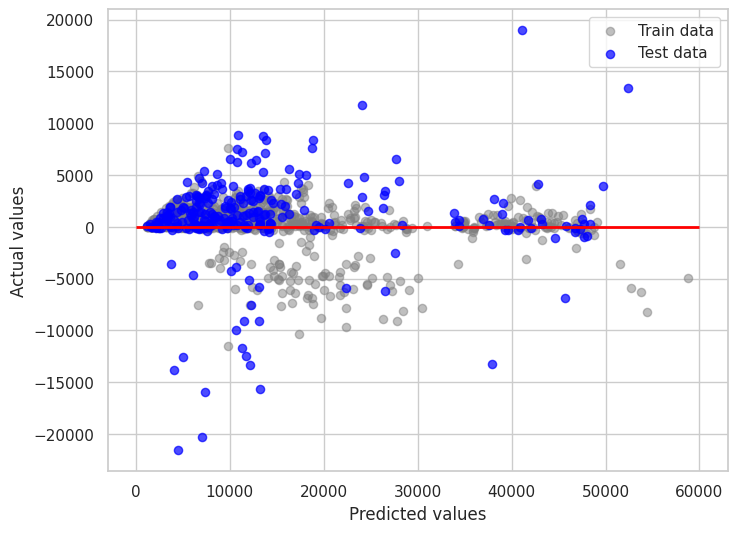

In [83]:
plt.figure(figsize=(8,6))

plt.scatter(x_train_pred, x_train_pred - y_train,
          c = 'gray', marker = 'o', s = 35, alpha = 0.5,
          label = 'Train data')
plt.scatter(x_test_pred, x_test_pred - y_test,
          c = 'blue', marker = 'o', s = 35, alpha = 0.7,
          label = 'Test data')
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.legend(loc = 'upper right')
plt.hlines(y = 0, xmin = 0, xmax = 60000, lw = 2, color = 'red')

Feature importance ranking


1.smoker(0.601678)
2.bmi(0.218831)
3.age(0.136943)
4.children(0.020990)
5.region(0.015165)
6.sex(0.006393)


<BarContainer object of 6 artists>

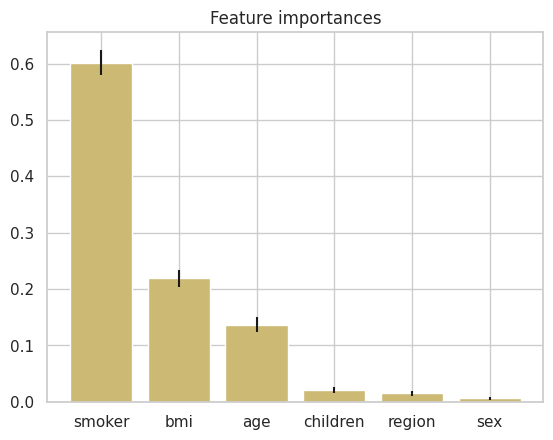

In [84]:
print('Feature importance ranking\n\n')
importances = Rfr.feature_importances_
std = np.std([tree.feature_importances_ for tree in Rfr.estimators_],axis=0)
indices = np.argsort(importances)[::-1]
variables = ['age', 'sex', 'bmi', 'children','smoker', 'region']
importance_list = []
for f in range(x.shape[1]):
    variable = variables[indices[f]]
    importance_list.append(variable)
    print("%d.%s(%f)" % (f + 1, variable, importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(importance_list, importances[indices],
       color="y", yerr=std[indices], align="center")

**Polynomial Regression**

In [85]:
from sklearn.preprocessing import PolynomialFeatures
x = df.drop(['charges', 'sex', 'region'], axis = 1)
y = df.charges
pol = PolynomialFeatures (degree = 2)
x_pol = pol.fit_transform(x)
x_train, x_test, y_train, y_test = holdout(x_pol, y, test_size=0.2, random_state=0)
Pol_reg = LinearRegression()
Pol_reg.fit(x_train, y_train)
y_train_pred = Pol_reg.predict(x_train)
y_test_pred = Pol_reg.predict(x_test)
print(Pol_reg.intercept_)
print(Pol_reg.coef_)
print(Pol_reg.score(x_test, y_test))

-5325.881705252808
[ 0.00000000e+00 -4.01606591e+01  5.23702019e+02  8.52025026e+02
 -9.52698471e+03  3.04430186e+00  1.84508369e+00  6.01720286e+00
  4.20849790e+00 -9.38983382e+00  3.81612289e+00  1.40840670e+03
 -1.45982790e+02 -4.46151855e+02 -9.52698471e+03]
0.8812595703345227


In [86]:
##Evaluating the performance of the algorithm
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_test_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_test_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

Mean Absolute Error: 2824.4950454776654
Mean Squared Error: 18895160.098780412
Root Mean Squared Error: 4346.856346692448


In [87]:
##Predicting the charges
y_test_pred = Pol_reg.predict(x_test)
##Comparing the actual output values with the predicted values
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})
df

,Actual,Predicted
578,9724.53000,12101.156323
610,8547.69130,10440.782266
569,45702.02235,48541.022951
1034,12950.07120,14140.067522
198,9644.25250,8636.235727
...,...,...
1084,15019.76005,16712.196281
726,6664.68595,8654.565461
1132,20709.02034,12372.050609
725,40932.42950,41465.617268


**Conclusion: like we previously noticed smoking is the greatest factor that affects medical cost charges, then it's bmi and age. Polynomial Regression turned out to be the best model**